In [1]:
import numpy as np
from tensorflow.keras.models import Sequential  # 모델 객체 생성
from tensorflow.keras.layers import Dense, Input # 모델 layer 쌓을 때 필요한 함수
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. XOR

In [10]:
x_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_data = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Input(shape=2, dtype=tf.float32))
model.add(Dense(units=10, 
                input_shape=(2,), #input_dim=2, 
                activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) # 이진분류
# model.compile(loss='categorical_crossntropy', optimizer='adam', metrics=['accuracy']) 다중분류에서

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# 4. 학습
hist = model.fit(x=x_data, y=y_data,
                 epochs = 100,
                 verbose = 1
                )

Epoch 1/100
1/1 [==============================] - 0s 451ms/step - loss: 0.6859 - binary_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6848 - binary_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6837 - binary_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6826 - binary_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6815 - binary_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6806 - binary_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6797 - binary_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6789 - binary_accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6781 - binary_accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 6ms/step - loss: 0.5791 - binary_accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5770 - binary_accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5748 - binary_accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5726 - binary_accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5703 - binary_accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5681 - binary_accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5657 - binary_accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5634 - binary_accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5611 - binary_accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 8ms/step - lo

In [13]:
# 5. 학습과정 보기 및 평가
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

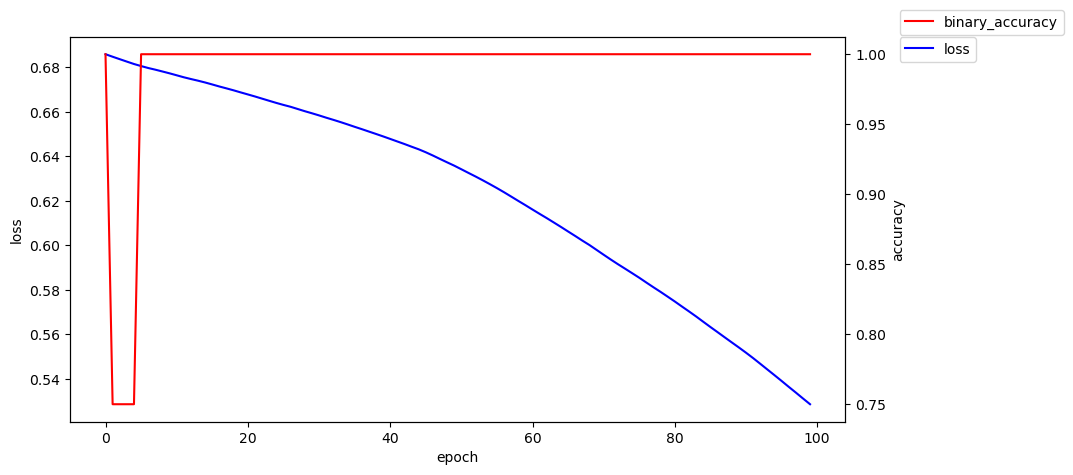

In [29]:
fig, loss_ax = plt.subplots(figsize = (10,5))
loss_ax.plot(hist.history['loss'], 'b', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'], 'r', label='binary_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.07, 1.07), loc=2, borderaxespad=0.)
plt.show()

In [31]:
# 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss :', score[0])
print('accuracy :', score[1])

1/1 [==============================] - 0s 49ms/step - loss: 0.5260 - binary_accuracy: 1.0000
loss : 0.5259815454483032
accuracy : 1.0


In [41]:
# 예측
int(model.predict(np.array([[0,1]])).round())

1/1 [==============================] - 0s 35ms/step


1

In [55]:
# 독립변수 2개(0 0, 0 1, 1 0, 1 1)를 입력받아 예측값을 출력(종료는 수를 1개만 입력할 때)
while True:
    input_num = input('스페이스로 분리해서 0 또는 1을 2개 입력(한개만 입력하면 종료됩니다)')
    input_num_arr = input_num.strip().split()
    input_nums = list(map(lambda x : int(x), input_num_arr))
    if len(input_nums)<2:
        print('프로그램을 종료합니다')
        break
    elif all(x in [0,1] for x in input_nums):
        input_data = np.array(input_nums[:2]).reshape(-1, 2)
        print('입력값 :', input_data)
        print('예측값 :',int(model.predict([input_data]).round()))
    else:
        print('0과 1중에서 입력해주세요')

스페이스로 분리해서 0 또는 1을 2개 입력(한개만 입력하면 종료됩니다)0    1     1
1/1 [==============================] - 0s 97ms/step
1
스페이스로 분리해서 0 또는 1을 2개 입력(한개만 입력하면 종료됩니다)0    0    1
1/1 [==============================] - 0s 50ms/step
0
스페이스로 분리해서 0 또는 1을 2개 입력(한개만 입력하면 종료됩니다)6
프로그램을 종료합니다


# 2. AND

In [94]:
# 1. dataset
x_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_data = np.array([[0],[0],[0],[1]])

# 2. 모델 구성
model = Sequential()

model.add(Input(shape=2, dtype=tf.float32))
model.add(Dense(units=10, input_dim=2, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                30        
                                                                 
 dense_23 (Dense)            (None, 20)                220       
                                                                 
 dense_24 (Dense)            (None, 1)                 21        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
# 3. 모델학습과정 설정(이진분류)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [96]:
# 4. 학습
hist = model.fit(x_data, y_data,
                 epochs=100,
                 verbose=1
                )

Epoch 1/100
1/1 [==============================] - 0s 415ms/step - loss: 0.6876 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6854 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6831 - binary_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6808 - binary_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6785 - binary_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6763 - binary_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6740 - binary_accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6718 - binary_accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6695 - binary_accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 7ms/step - loss: 0.5267 - binary_accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5247 - binary_accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5226 - binary_accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5205 - binary_accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5183 - binary_accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5162 - binary_accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5142 - binary_accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5121 - binary_accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5101 - binary_accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 8ms/step - lo

In [97]:
hist.history

{'loss': [0.6875954866409302,
  0.6854215860366821,
  0.6830822229385376,
  0.6807852983474731,
  0.6785193085670471,
  0.6762552261352539,
  0.6740099787712097,
  0.6717681288719177,
  0.6695260405540466,
  0.6672834753990173,
  0.6650398969650269,
  0.6627945899963379,
  0.6605468988418579,
  0.658477783203125,
  0.6563831567764282,
  0.6542880535125732,
  0.6521885991096497,
  0.6500879526138306,
  0.647994875907898,
  0.6458983421325684,
  0.643796980381012,
  0.6417068839073181,
  0.6396543979644775,
  0.6376335620880127,
  0.6356183290481567,
  0.6336091756820679,
  0.6315993070602417,
  0.6295901536941528,
  0.6275840997695923,
  0.6255816221237183,
  0.6235764622688293,
  0.621584415435791,
  0.6196327209472656,
  0.6176828742027283,
  0.6157179474830627,
  0.6137518286705017,
  0.6117802858352661,
  0.6098014116287231,
  0.6078159809112549,
  0.6058294773101807,
  0.6038516759872437,
  0.601860523223877,
  0.5998332500457764,
  0.5977983474731445,
  0.5958260297775269,
  0.593

In [99]:
# 5. 학습과정 살펴보기 및 평가
score = model.evaluate(x_data, y_data)
print('loss :', score[0])
print('accuracy :', score[1])

1/1 [==============================] - 0s 65ms/step - loss: 0.4794 - binary_accuracy: 1.0000
loss : 0.4793718755245209
accuracy : 1.0


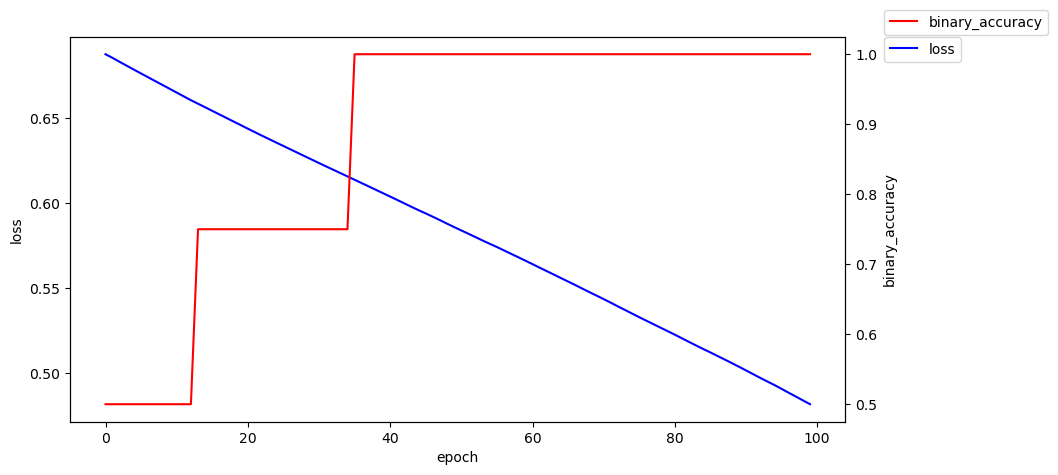

In [100]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'b', label = 'loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'r', label = 'binary_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')
loss_ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.05, 1.07), loc=2, borderaxespad=0.)
plt.show()

In [102]:
# 6. 예측하기 : np.array([[0, 1]])를 예측하기
int(model.predict(np.array([[0, 1]])) > 0.5)

1/1 [==============================] - 0s 64ms/step


0